In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from ipywidgets import interactive

In [2]:
@njit
def dv_xdt(v_x,v_y,D,m,beta,gamma):
    f1=-beta*D/m
    f2=-gamma*D**2/m
    dvdt=f1*v_x+f2*(v_x**2+v_y**2)**0.5*v_x
    return(dvdt)

@njit
def rk4_v_x(v_x,v_y,D,m,beta,gamma,dt):
    k0=dv_xdt(v_x,v_y,D,m,beta,gamma)
    k1=dv_xdt(v_x+k0/2,v_y,D,m,beta,gamma)
    k2=dv_xdt(v_x+k1/2,v_y,D,m,beta,gamma)
    k3=dv_xdt(v_x+k2/2,v_y,D,m,beta,gamma)
    dx=dt/6*(k0+2*k1+2*k2+k3)
    return(v_x)
    
@njit
def dv_ydt(v_x,v_y,D,m,beta,gamma,g):
    f1=-beta*D/m
    f2=-gamma*D**2/m
    dvdt=-g+f1*v_x+f2*(v_x**2+v_y**2)**0.5*v_x
    return(dvdt)

@njit
def rk4_v_y(v_x,v_y,D,m,beta,gamma,dt,g):
    k0=dv_ydt(v_x,v_y,D,m,beta,gamma,g)
    k1=dv_ydt(v_x,v_y+k0/2,D,m,beta,gamma,g)
    k2=dv_ydt(v_x,v_y+k1/2,D,m,beta,gamma,g)
    k3=dv_ydt(v_x,v_y+k2/2,D,m,beta,gamma,g)
    v_y+=dt/6*(k0+2*k1+2*k2+k3)
    return(v_y)
    
@njit
def dr_xdt(v_x):
    return(v_x)
    
@njit
def rk4_r_x(r_x,v_x,dt):
    k0=dr_xdt(v_x)
    k1=dr_xdt(v_x+dt/2)
    k2=dr_xdt(v_x+dt/2)
    k3=dr_xdt(v_x+dt)
    r_x+=dt/6*(k0+2*k1+2*k2+k3)
    return(r_x)
    
@njit
def dr_ydt(v_y):
    return(v_y)
    
@njit
def rk4_r_y(r_y,v_y,dt):
    k0=dr_ydt(v_y)
    k1=dr_ydt(v_y+dt/2)
    k2=dr_ydt(v_y+dt/2)
    k3=dr_ydt(v_y+dt)
    r_y+=dt/6*(k0+2*k1+2*k2+k3)
    return(r_y)

In [9]:
def trajectory(theta,v,y,D,m,beta,gamma,g,time_steps):
    
    theta=theta*np.pi/180
    v_i_x=v*np.cos(theta)
    v_i_y=v*np.sin(theta)
    D=D*0.01
    m=m*0.001
    beta=beta*10**(-4)
    dt=1/time_steps
    gamma*=10**(-2)
    
    i=0
    
    v_x_rk=[]
    v_y_rk=[]
    r_x_rk=[]
    r_y_rk=[]

    v_x_rk=[v_i_x]
    v_y_rk=[v_i_y]
    r_x_rk=[0]
    r_y_rk=[y]

    while r_y_rk[i]>=0:
        
        v_x_rk.append(rk4_v_x(v_x_rk[i],v_y_rk[i],D,m,beta,gamma,dt)) 
        v_y_rk.append(rk4_v_y(v_x_rk[i],v_y_rk[i],D,m,beta,gamma,dt,g)) 
        r_x_rk.append(rk4_r_x(r_x_rk[i],v_x_rk[i],dt))
        r_y_rk.append(rk4_r_y(r_y_rk[i],v_y_rk[i],dt))
        
        i+=1 

    
    a=np.where(r_y_rk==np.max(r_y_rk))
    y_max=np.max(r_y_rk) 
    x_max=np.max(r_x_rk[a[0][0]])
     
    fig=plt.figure(figsize=(10,10),facecolor='white')
    plt.plot(r_x_rk,r_y_rk,'--k',x_max,y_max,'ro')
    plt.xlabel('Range [m]')
    plt.ylabel('Height [m]')
    plt.legend(["Trajectory","Max Height"])
    plt.title("Time of flight=%.8fs, Range=%.8fm, Maximum height=%.8fm"%(i*dt,r_x_rk[-1],y_max),fontsize=16)
    plt.grid()
    plt.xticks(np.arange(0,r_x_rk[-1],step=1.0))
    plt.yticks(np.arange(0,y_max+2,step=1.0))
    plt.xlim((0,r_x_rk[-1]))
    plt.ylim((0,y_max+1))
    plt.show()

In [10]:
iplot=interactive(trajectory,
                 theta=(0,90,1),
                 v=(1,25,1),
                 y=(0,50,1),
                 D=(1,50,1),
                 m=(10,1000,10),
                 beta=(0,100,0.1),
                 gamma=(0,10,0.1),
                 g=(1,30,1),
                 time_steps=(1,100000,1))
iplot

interactive(children=(IntSlider(value=45, description='theta', max=90), IntSlider(value=13, description='v', m…

Enter the number of time steps:  10


24


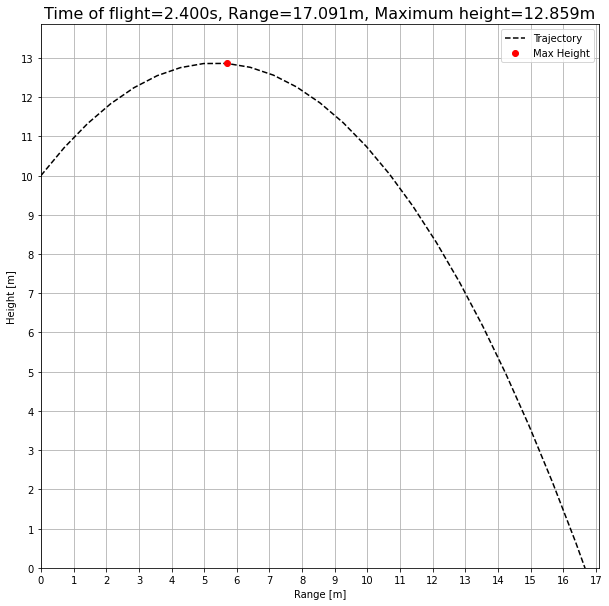

It took 0.27494168281555176s


In [5]:
import time
t=int(input("Enter the number of time steps: "))
t1=time.time()
trajectory(45,10,10,10,10,0.1,0.25,10,t)
t2=time.time()
print("It took {}s".format(t2-t1))